# Importing Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

===================================================================================================================

# Importing & Reading Data

In [3]:
df = pd.read_excel("Concrete Data.xlsx")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [6]:
df.shape

(1030, 9)

In [7]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [10]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


===================================================================================================================

# Exploring Data Analysis

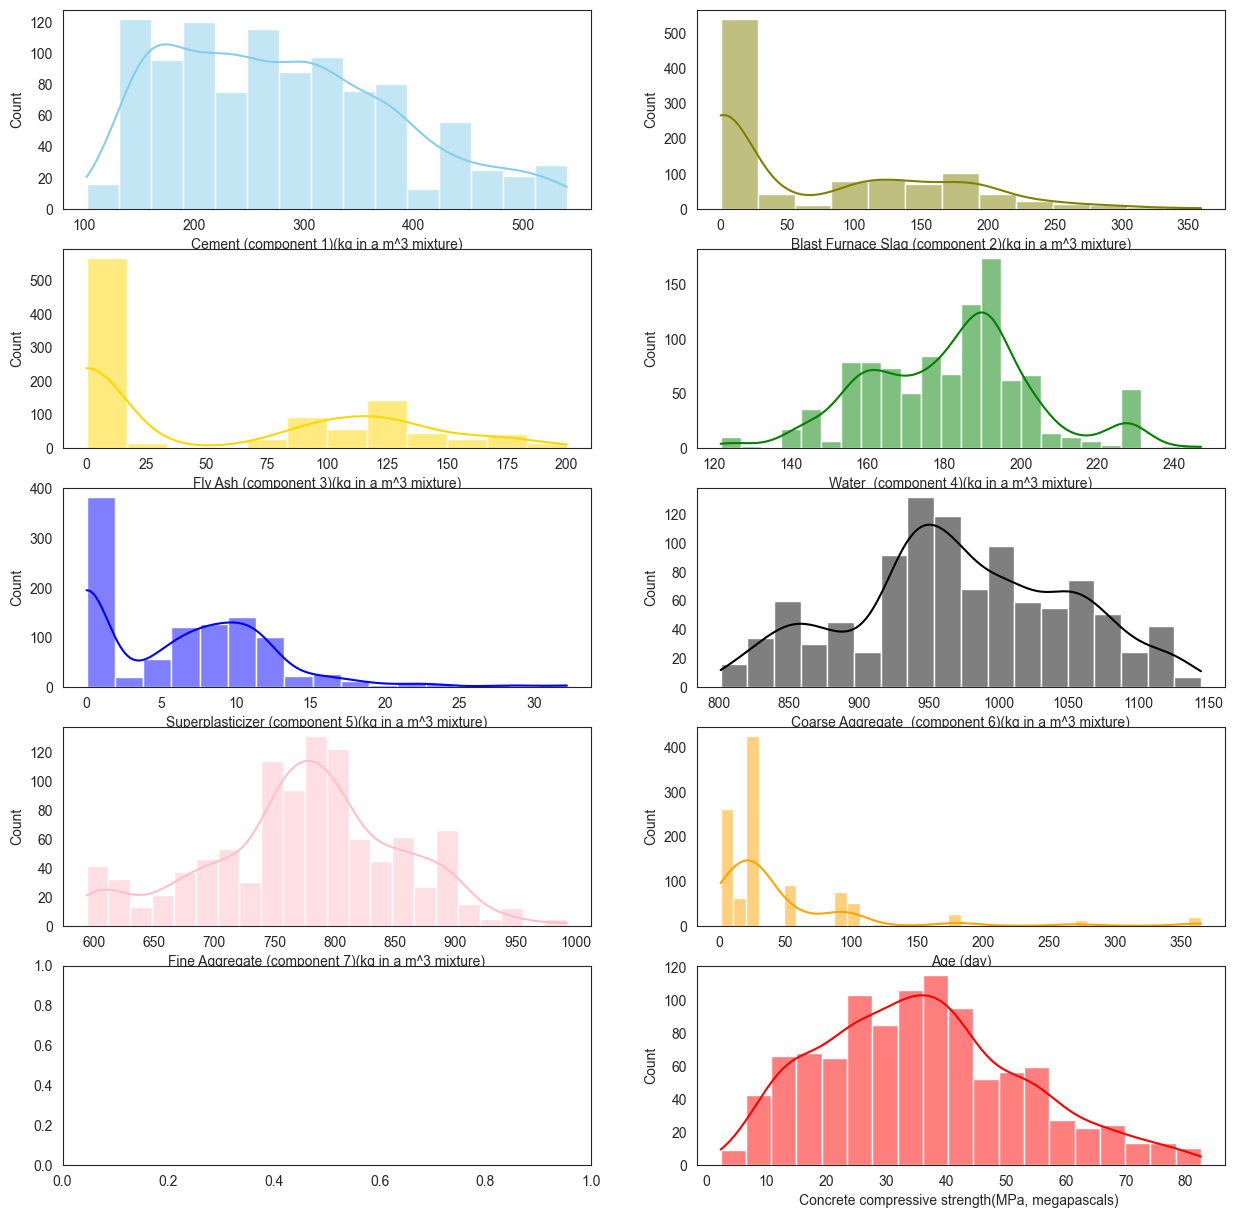

In [81]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

sns.histplot(data=df, x="Cement (component 1)(kg in a m^3 mixture)", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Blast Furnace Slag (component 2)(kg in a m^3 mixture)", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Fly Ash (component 3)(kg in a m^3 mixture)", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Water  (component 4)(kg in a m^3 mixture)", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=df, x="Superplasticizer (component 5)(kg in a m^3 mixture)", kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x="Coarse Aggregate  (component 6)(kg in a m^3 mixture)", kde=True, color="black", ax=axs[2, 1])
sns.histplot(data=df, x="Fine Aggregate (component 7)(kg in a m^3 mixture)", kde=True, color="pink", ax=axs[3, 0])
sns.histplot(data=df, x="Age (day)", kde=True, color="orange", ax=axs[3, 1])
sns.histplot(data=df, x="Concrete compressive strength(MPa, megapascals) ", kde=True, color="red", ax=axs[4, 1])
plt.show()

C:\Users\omarahmed\AppData\Local\Temp\ipykernel_7420\1811819739.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


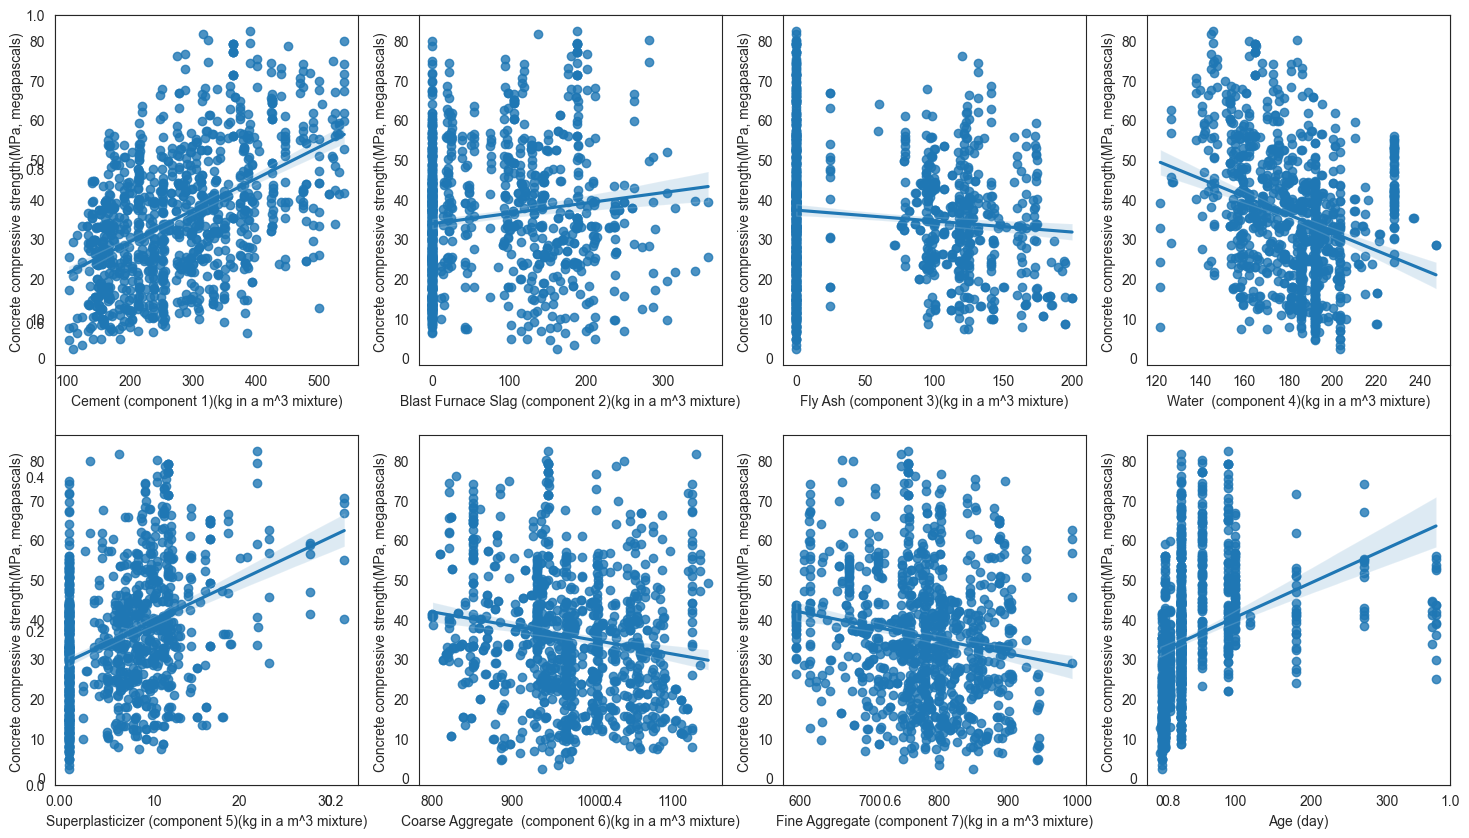

In [95]:
df_numeric = df[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 
       'Age (day)','Concrete compressive strength(MPa, megapascals) ']]

fig, axes = plt.subplots(figsize=(18,10))

for i in range(8):
    fig.add_subplot(2,4,i+1)
    sns.regplot(x=df_numeric.columns[i],y='Concrete compressive strength(MPa, megapascals) ',data=df_numeric)

fig.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Cement (component 1)(kg in a m^3 mixture)'),
  Text(1, 0, 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'),
  Text(2, 0, 'Fly Ash (component 3)(kg in a m^3 mixture)'),
  Text(3, 0, 'Water  (component 4)(kg in a m^3 mixture)'),
  Text(4, 0, 'Superplasticizer (component 5)(kg in a m^3 mixture)'),
  Text(5, 0, 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'),
  Text(6, 0, 'Fine Aggregate (component 7)(kg in a m^3 mixture)'),
  Text(7, 0, 'Age (day)'),
  Text(8, 0, 'Concrete compressive strength(MPa, megapascals) ')])

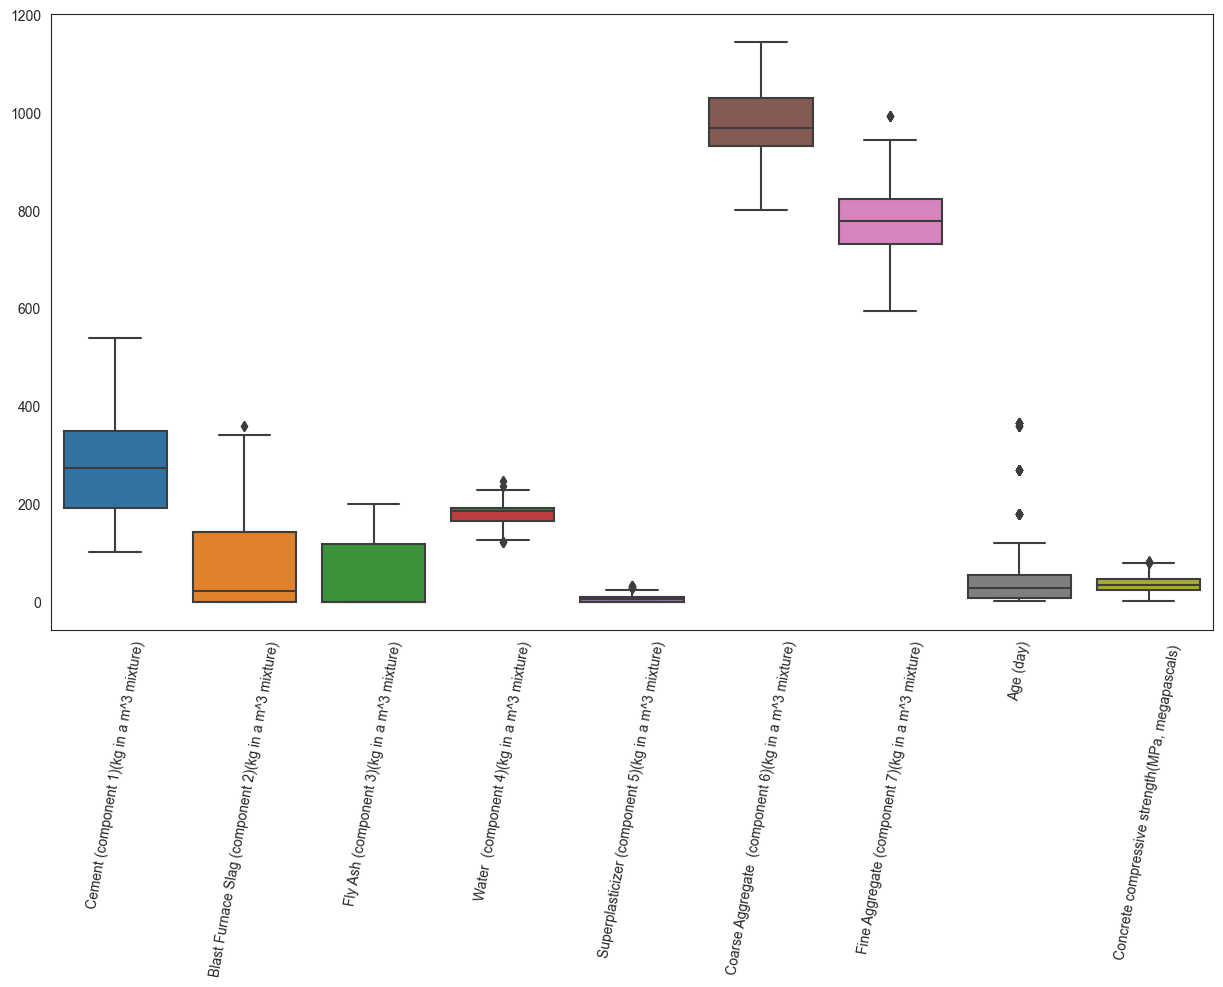

In [12]:
x = sns.set_style("white")
plt.figure(figsize = (15,8))
x = sns.boxplot(data = df)
plt.xticks(rotation=80)

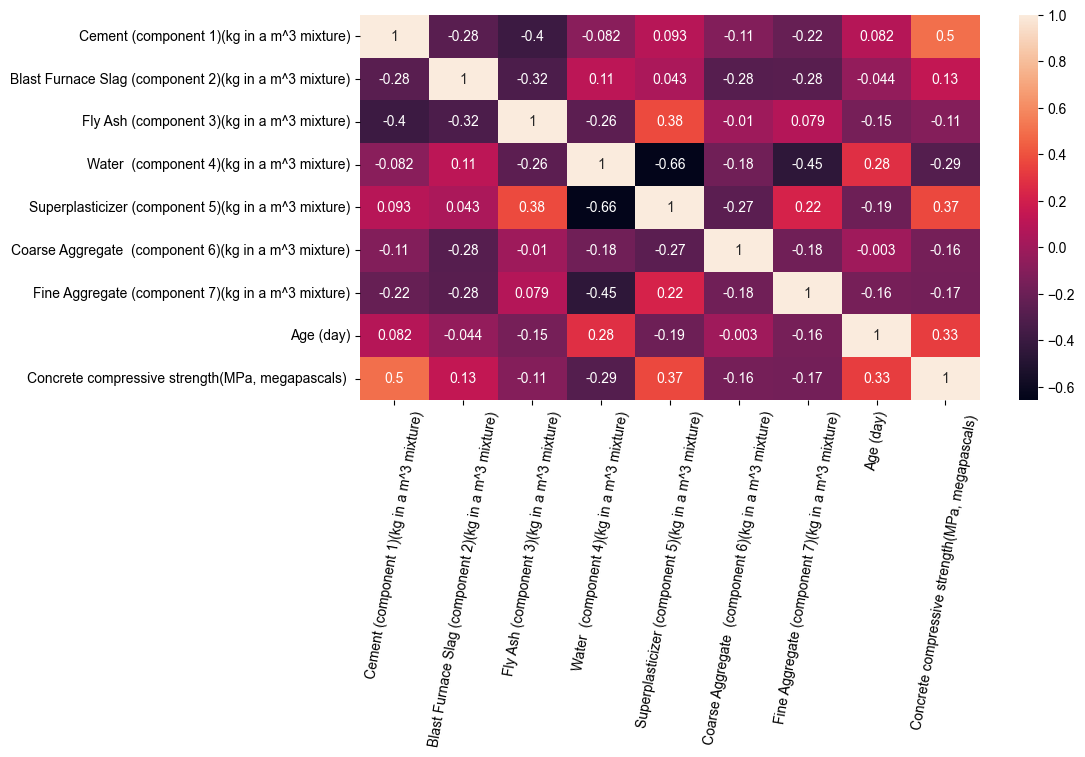

In [13]:
with plt.style.context('default'):
 fig,ax = plt.subplots(figsize=(10,5))
 sns_plot=sns.heatmap(df.corr(),annot= True)
 plt.xticks(rotation=80)

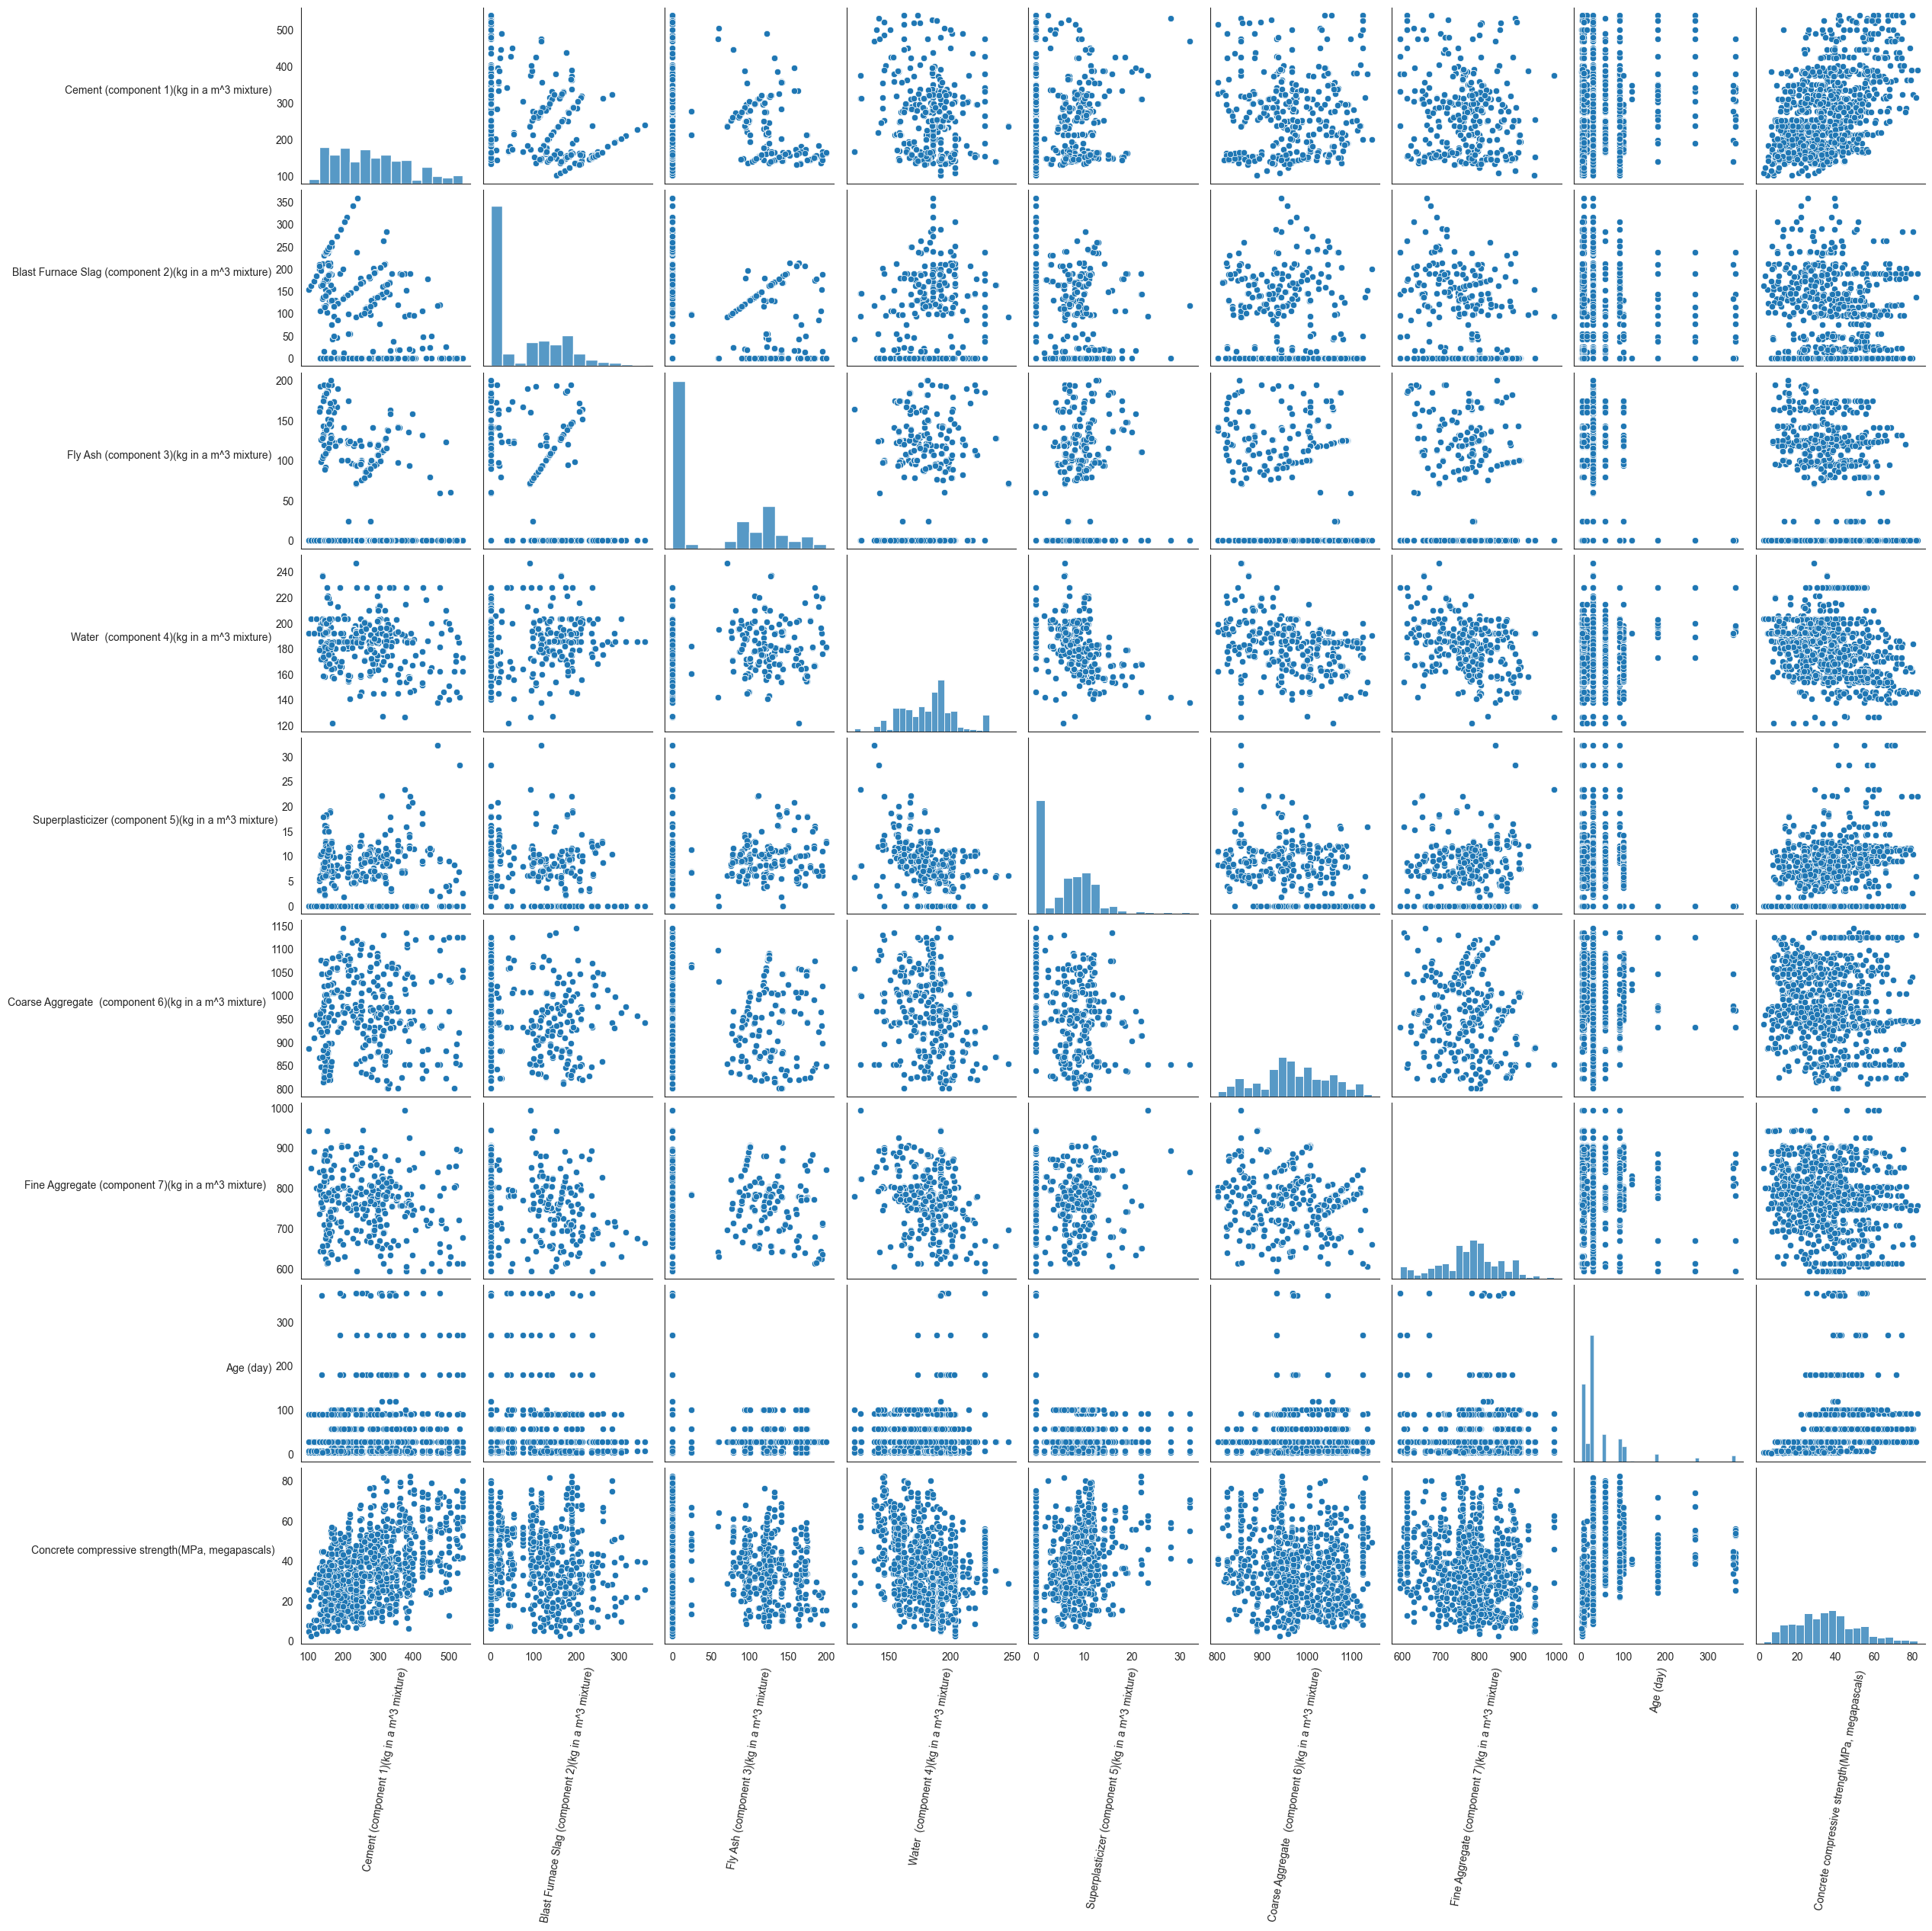

In [14]:
g = sns.pairplot(df, kind="scatter")
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 80)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')


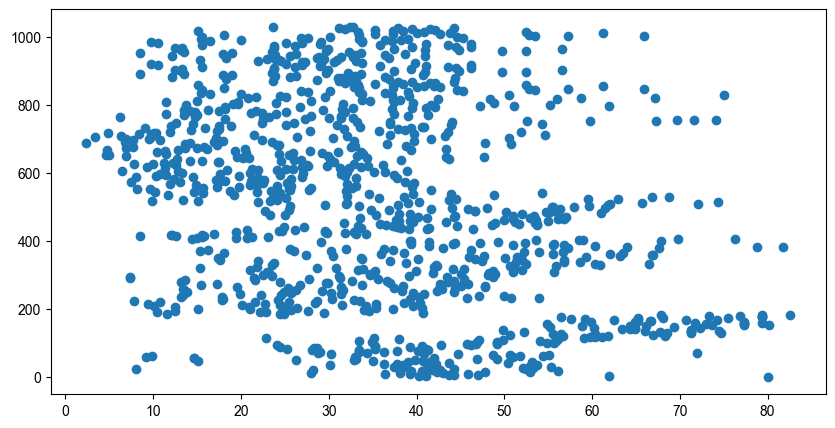

In [15]:
with plt.style.context('default'):
 fig,ax = plt.subplots(figsize=(10,5))
 plt.scatter(x = df["Concrete compressive strength(MPa, megapascals) "] , y=range(0,1030))

===================================================================================================================

# Data Pre-Processing

### Splitting Data

In [16]:
x = df.drop("Concrete compressive strength(MPa, megapascals) " , axis = 1)
y = df["Concrete compressive strength(MPa, megapascals) "]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)

### Features Scalling

In [18]:
print("Data before scalling: ")
print(np.max(x_train) , "\n")
print(np.min(x_train))

Data before scalling: 
Cement (component 1)(kg in a m^3 mixture)                 540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     359.4
Fly Ash (component 3)(kg in a m^3 mixture)                200.1
Water  (component 4)(kg in a m^3 mixture)                 247.0
Superplasticizer (component 5)(kg in a m^3 mixture)        32.2
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture)         992.6
Age (day)                                                 365.0
dtype: float64 

Cement (component 1)(kg in a m^3 mixture)                102.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.00
Fly Ash (component 3)(kg in a m^3 mixture)                 0.00
Water  (component 4)(kg in a m^3 mixture)                121.75
Superplasticizer (component 5)(kg in a m^3 mixture)        0.00
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     801.00
Fine Aggregate (component 7)(kg in a m^3 mixture)        594.00


C:\Users\omarahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\omarahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Data after scalling: ")
print(np.max(x_train))
print(np.min(x_train))

Data after scalling: 
5.125978427358858
-2.795153694578189


### Polynomial Features

In [20]:
Poly = PolynomialFeatures(degree=6)
Poly_x_train = Poly.fit_transform(x_train)
Poly_x_test = Poly.transform(x_test)

===================================================================================================================

# Building the Model

## Ridge 

In [99]:
#for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:    
ridge = Ridge(alpha= 1e-2 , normalize=True)
ridge.fit(Poly_x_train, y_train)
ridge1 = ridge.predict(Poly_x_test)
AccOfRidge = 1 - r2_score(y_test,ridge1)

C:\Users\omarahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


## Model Evaluation for Ridge Regression

In [101]:
print("Accuracy: " , AccOfRidge * 100 , "%")

Accuracy:  95.37985324906234 %


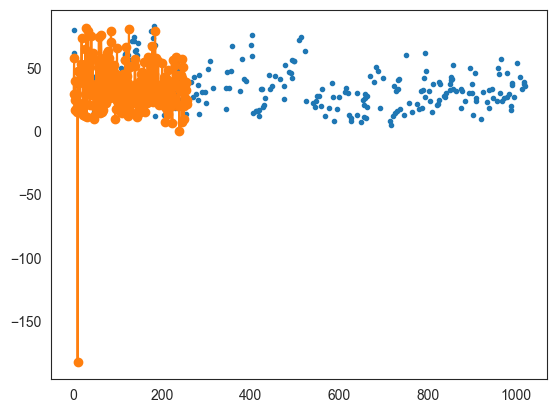

In [98]:
plt.plot(y_test, '.',ridge1,'-o')
plt.show()

===================================================================================================================

## Support Vector Regressor

In [21]:
Regressor = SVR()
Regressor.fit(Poly_x_train,y_train)
predictionsOfSVR = Regressor.predict(Poly_x_test)

## Model Evaluation for SVR

In [22]:
AccOfSVRTest = 1 - r2_score(y_test,predictionsOfSVR)
print("Test Accuracy: " , AccOfSVRTest * 100 , "%")


Test Accuracy:  97.57989557802004 %


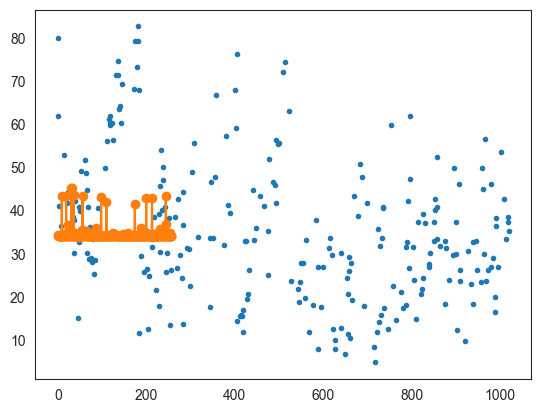

In [23]:
plt.plot(y_test, '.',predictionsOfSVR,'-o')
plt.show()

===================================================================================================================

# Lasso

In [102]:
#for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:    
lasso = Lasso(alpha= 1e-4 , normalize=True)
lasso.fit(Poly_x_train, y_train)
lasso1 = lasso.predict(Poly_x_test)
AccOfLasso = 1 - r2_score(y_test,lasso1)

C:\Users\omarahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\omarahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: Conve

## Model Evaluation for Lasso Regression

In [103]:
print("Accuracy: " , AccOfLasso * 100)

Accuracy:  57.0686238602362


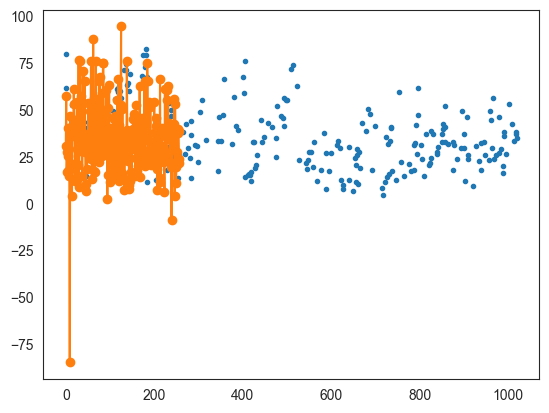

In [27]:
plt.plot(y_test, '.',lasso1,'-o')
plt.show()

===================================================================================================================